# Times Table With Python - Inspired by Mathologer

In [1]:
%%HTML
<center>
<iframe width="960" height="540" frameborder="0" allowfullscreen src="https://www.youtube.com/embed/qhbuKbxJsk8"></iframe>
</center>

## General Imports and Configurations

In [2]:
# General Purpose
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import matplotlib.lines as mlines
import colorsys
from matplotlib.collections import LineCollection

# Jupyter Specifics
import matplotlib as mpl
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline
rc('animation', html='html5')

## Basic Functions

In [3]:
def points_arround_circle(number=100, center=(0,0), radius=1):
    theta = np.linspace(0, 2 * np.pi - (2 * np.pi / number), number)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return (x, y)

def get_lines_from_points(x, y, factor, animated=None):
    limit = len(x)
    if animated is not None:
        for i in range(limit):
            x_range = (x[i], x[int(i * factor) % limit])
            y_range = (y[i], y[int(i * factor) % limit])
            yield mlines.Line2D(x_range, y_range)
    else:
        for i in range(limit):
            start = (x[i], y[i])
            index = int((i * factor) % limit)
            end = (x[index], y[index])          
            yield end, start

def plot_circle_points(x, y, ax, labels=None):
    ax.annotate("Points: {}".format(len(x)), (0.8, 0.9))
    ax.plot(x, y, "-ko", markevery=1)
    if not labels is None:
        for i, (x, y) in enumerate(zip(x, y)):
            ax.annotate(i, (x, y))

def plot_lines(x, y, factor, ax, color=None):
    ax.annotate("Factor: {}".format(factor), (0.8, 1))
    lines = list(get_lines_from_points(x, y, factor))
    if color is None:
        line_segments = LineCollection(lines)
    else:
        line_segments = LineCollection(lines, colors=colorsys.hsv_to_rgb(color, 1.0, 0.8))
            
    ax.add_collection(line_segments)

## Static Version

In [4]:
def plot_static(factor, points):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    plt.axis('off')

    x, y = points_arround_circle(number=points)

    plot_circle_points(x, y, ax)
    plot_lines(x, y, factor, ax)

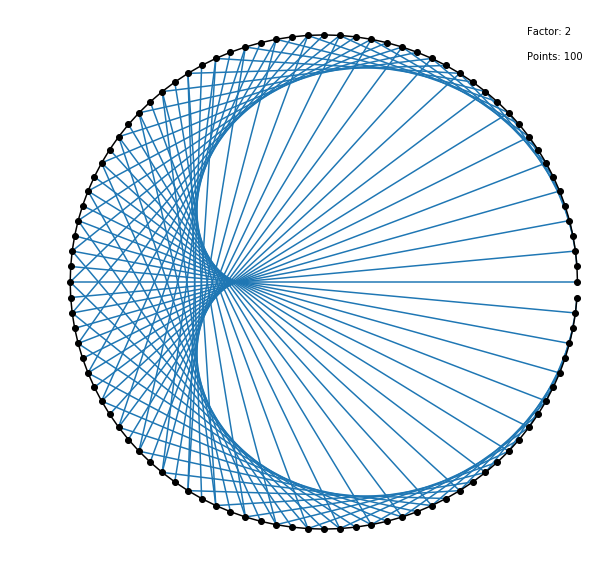

In [5]:
factor = 2
points = 100
plot_static(factor, points)

## Parametric Version

In [6]:
def plot_parametric(Factor=2, Points=100):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    plt.axis('off')
    x, y = points_arround_circle(number=Points)
    plot_circle_points(x, y, ax)
    plot_lines(x,y,Factor, ax)
    plt.show()

factors = [21, 29, 33, 34, 49, 51, 66, 67, 73, 76, 79, 80, 86, 91, 99]
print("Try these Factors with different number of points:", *factors)    

interact(plot_parametric, 
         Factor=FloatSlider(min=0,max=100,step=0.1,value=2, layout=Layout(width='99%')), 
         Points=IntSlider(min=0,max=300,step=25,value=100, layout=Layout(width='99%')));

Try these Factors with different number of points: 21 29 33 34 49 51 66 67 73 76 79 80 86 91 99


interactive(children=(FloatSlider(value=2.0, description='Factor', layout=Layout(width='99%')), IntSlider(valu…

## Animate Construction Line by Line
You may have to wait until it loads completely

In [7]:
def animate_line_by_line(i, lines, ax):
    ax.add_line(next(lines))
    return []

def line_by_line(Factor, Points, Interval):
    fig, ax = plt.subplots(figsize=(10, 10));
    plt.axis('off')
    x, y = points_arround_circle(number=Points)
    plot_circle_points(x, y, ax)
    ax.annotate("Factor: {}".format(Factor), (0.8, 1))
    ax.annotate("Interval: {}".format(Interval), (0.8, 0.8))
    lines = get_lines_from_points(x, y, Factor, animated=True)
    anim = animation.FuncAnimation(fig, animate_line_by_line, frames=len(x)-2, interval=Interval, blit=True, fargs=(lines, ax));
    plt.close()
    
    return anim

interact(line_by_line,
         Factor=FloatSlider(min=0,max=100,step=0.1,value=2, layout=Layout(width='99%')), 
         Points=IntSlider(min=1,max=200,step=1,value=100, layout=Layout(width='99%')),
         Interval=IntSlider(min=5,max=500,step=5,value=75, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=2.0, description='Factor', layout=Layout(width='99%')), IntSlider(valu…

In [8]:
anim = line_by_line(Factor=2, Points=100, Interval=500)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30)

anim.save('line_by_line.mp4', writer=writer)

## Animate Construction Point by Point
You may have to wait until it loads completely

In [9]:
def animate_point_by_point(i, ax, Factor, Interval):
    ax.cla()
    ax.axis('off')
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(-1.2, 1.2)
    ax.annotate("Interval: {}".format(Interval), (0.8, 0.8))
    x, y = points_arround_circle(number=i+1)
    plot_circle_points(x, y, ax)
    plot_lines(x,y,Factor, ax)
    return []

def point_by_point(Factor, Interval, Max_Points):
    fig, ax = plt.subplots(figsize=(10, 10));
    anim = animation.FuncAnimation(fig, animate_point_by_point, frames=Max_Points, interval=Interval, blit=True, fargs=(ax, Factor, Interval));
    plt.close()
    
    return anim

interact(point_by_point,
         Factor=FloatSlider(min=0,max=100,step=0.1,value=2, layout=Layout(width='99%')),
         Max_Points=IntSlider(min=1,max=200,step=1,value=75, layout=Layout(width='99%')),
         Interval=IntSlider(min=100,max=500,step=1,value=200, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=2.0, description='Factor', layout=Layout(width='99%')), IntSlider(valu…

In [10]:
anim = point_by_point(Factor=2, Max_Points=100, Interval=75)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15)

anim.save('point_by_point.mp4', writer=writer)

## Animate Construction Factor by Factor
You may have to wait until it loads completely

In [11]:
def animate_factor_by_factor(i, ax, Max_Points, Interval, frames):
    ax.cla()
    ax.axis('off')
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(-1.2, 1.2)
    ax.annotate("Interval: {}".format(Interval), (0.8, 0.8))
    x, y = points_arround_circle(number=Max_Points)
    plot_circle_points(x, y, ax)
    plot_lines(x, y, i / 10, ax)
    return []

def factor_by_factor(Factor, Interval, Max_Points):
    fig, ax = plt.subplots(figsize=(10, 10));
    frames = int(Factor * 10)
    anim = animation.FuncAnimation(fig, animate_factor_by_factor, frames=frames, interval=Interval, blit=True, fargs=(ax, Max_Points, Interval, frames));
    
    plt.close()
    
    return anim

interact(factor_by_factor,
         Factor=FloatSlider(min=0,max=100,step=0.1,value=5, layout=Layout(width='99%')),
         Max_Points=IntSlider(min=1,max=200,step=1,value=100, layout=Layout(width='99%')),
         Interval=IntSlider(min=50,max=500,step=25,value=100, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=5.0, description='Factor', layout=Layout(width='99%')), IntSlider(valu…

In [12]:
anim = factor_by_factor(Factor=5.1, Max_Points=150, Interval=75)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12)

anim.save('factor_by_factor.mp4', writer=writer)

## Animate Construction Factor by Factor with Color
You may have to wait until it loads completely

In [13]:
def animate_factor_by_factor_colored(i, ax, Max_Points, Interval, frames):
    ax.cla()
    ax.axis('off')
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(-1.2, 1.2)
    ax.annotate("Interval: {}".format(Interval), (0.8, 0.8))
    x, y = points_arround_circle(number=Max_Points)
    plot_circle_points(x, y, ax)
    plot_lines(x, y, i / 10, ax, color=i / frames)
    return []

def factor_by_factor_colored(Factor, Interval, Max_Points):
    fig, ax = plt.subplots(figsize=(10, 10));
    frames = int(Factor * 10)
    anim = animation.FuncAnimation(fig, animate_factor_by_factor_colored, frames=frames, interval=Interval, blit=True, fargs=(ax, Max_Points, Interval, frames));
    
    plt.close()
    
    return anim

interact(factor_by_factor_colored,
         Factor=FloatSlider(min=0,max=100,step=0.1,value=5, layout=Layout(width='99%')),
         Max_Points=IntSlider(min=1,max=200,step=1,value=100, layout=Layout(width='99%')),
         Interval=IntSlider(min=50,max=500,step=25,value=100, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=5.0, description='Factor', layout=Layout(width='99%')), IntSlider(valu…

In [14]:
anim = factor_by_factor_colored(Factor=5.1, Max_Points=150, Interval=75)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12)

anim.save('factor_by_factor_colored.mp4', writer=writer)